# Statistiques descriptives que sur 2023

Le but de ce Notebook est de commencer à appréhender les bases de données des fréquentations : à savoir de les reformater et d'en tirer des premières observations.

In [40]:
# import des packages
from donnees_IDFM import donnees_archives, donnees_validation_23, donnees_profils_23
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [41]:
# importation des deux bases de données 2023
validations_23=donnees_validation_23()
profils_23=donnees_profils_23()

# 0.  Prise en main et nettoyage de la base de données des validations année 2023

In [42]:
validations_23.head(10)

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,lda,CATEGORIE_TITRE,NB_VALD
0,2023-06-26,800,853,568,MONTSOULT,67000,?,28
1,2023-06-26,800,853,568,MONTSOULT,67000,AMETHYSTE,9
2,2023-06-26,800,853,568,MONTSOULT,67000,IMAGINE R,388
3,2023-06-26,800,853,568,MONTSOULT,67000,TST,114
4,2023-06-26,800,853,595,NOINTEL MOURS,67227,?,8
5,2023-06-26,800,853,595,NOINTEL MOURS,67227,FGT,12
6,2023-06-26,800,853,595,NOINTEL MOURS,67227,NAVIGO,312
7,2023-06-26,800,853,595,NOINTEL MOURS,67227,TST,42
8,2023-06-26,800,853,63,BELLOY ST MA,67126,TST,5
9,2023-06-26,800,853,637,PERSAN BEAUMONT,67292,FGT,181


In [43]:
validations_23.tail(10)

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,lda,CATEGORIE_TITRE,NB_VALD
1096199,2023-03-01,100,110,84,BOISSIERE,71301,AMETHYSTE,83
1096200,2023-03-01,100,110,84,BOISSIERE,71301,IMAGINE R,1097
1096201,2023-03-01,100,110,84,BOISSIERE,71301,NAVIGO JOUR,5
1096202,2023-03-01,100,110,84,BOISSIERE,71301,NON DEFINI,159
1096203,2023-03-01,100,110,842,SULLY-MORLAND,71201,AUTRE TITRE,483
1096204,2023-03-01,100,110,842,SULLY-MORLAND,71201,NON DEFINI,186
1096205,2023-03-01,100,110,848,TELEGRAPHE,71870,NON DEFINI,187
1096206,2023-03-01,100,110,848,TELEGRAPHE,71870,TST,386
1096207,2023-03-01,100,110,849,TEMPLE,71296,TST,95
1096208,2023-03-01,100,110,850,TERNES,71367,NAVIGO,4550


In [44]:
validations_23.shape

(1096209, 8)

Nous avons donc 1 096 209 lignes (nombre de données) et 8 colonnes (ie 8 variables)

In [45]:
validations_23.columns

Index(['JOUR', 'CODE_STIF_TRNS', 'CODE_STIF_RES', 'CODE_STIF_ARRET',
       'LIBELLE_ARRET', 'lda', 'CATEGORIE_TITRE', 'NB_VALD'],
      dtype='object')

Nos 8 variables initiales sont les suivantes : la date exacte du jour de l'année 2023, des variables d'identification de la ligne, le libellé de l'arrêt puis son identifiant dans la base de données de référence en IDF (ID_REFA_LDA), la catégorie du titre de validation, et enfin, le nombre de validations. 

Quelques précisions sur le nom des colonnes : 
- CODE_STIF_TRNS est le code correspondant au transporteur
- CODE_STIF_RES est le code correspondant au réseau
- CODE_STIF_ARRET est le code correspondant à l'arrêt

In [46]:
# nombre et liste des valeurs distinctes par variable

for colonne in validations_23.columns:
    nombre_distinct = validations_23[colonne].nunique()
    
    if nombre_distinct <= 15: #borne de 15 choisie après une première observation du nombre de variables différentes pour chaque variable et pour avoir des groupes cohérents
        valeurs_distinctes = validations_23[colonne].unique()
        
        print(f"Nombre de valeurs distinctes dans '{colonne}' est :", nombre_distinct)
        print(f"Liste des valeurs distinctes dans '{colonne}' est :", valeurs_distinctes)
        print()

    else :
        print(f"Nombre de valeurs distinctes dans '{colonne}' est :", nombre_distinct)
        print()

# première version :

#l1 = ['JOUR', 'CODE_STIF_ARRET', 'LIBELLE_ARRET', 'lda', 'NB_VALD']
#l2 = ['CODE_STIF_TRNS', 'CODE_STIF_RES', 'CATEGORIE_TITRE'] 
        
#for colonne in l2:
    #nombre_distinct = validations_23[colonne].nunique()
    #valeurs_distinctes = validations_23[colonne].unique()
    
    #print(f"Nombre de valeurs distinctes dans '{colonne}' est :", nombre_distinct)
    #print(f"Liste des valeurs distinctes dans '{colonne}' est :", valeurs_distinctes)
    #print()

#for colonne in l1:
    #nombre_distinct = validations_23[colonne].nunique()
    
    #print(f"Nombre de valeurs distinctes dans '{colonne}' est :", nombre_distinct)
    #print()

Nombre de valeurs distinctes dans 'JOUR' est : 181

Nombre de valeurs distinctes dans 'CODE_STIF_TRNS' est : 3
Liste des valeurs distinctes dans 'CODE_STIF_TRNS' est : [800 810 100]

Nombre de valeurs distinctes dans 'CODE_STIF_RES' est : 13
Liste des valeurs distinctes dans 'CODE_STIF_RES' est : ['853' '854' '801' '802' '110' 'ND' '800' '803' '804' '805' '850' '851'
 '852']

Nombre de valeurs distinctes dans 'CODE_STIF_ARRET' est : 756

Nombre de valeurs distinctes dans 'LIBELLE_ARRET' est : 747

Nombre de valeurs distinctes dans 'lda' est : 726

Nombre de valeurs distinctes dans 'CATEGORIE_TITRE' est : 9
Liste des valeurs distinctes dans 'CATEGORIE_TITRE' est : ['?' 'AMETHYSTE' 'IMAGINE R' 'TST' 'FGT' 'NAVIGO' 'NAVIGO JOUR'
 'NON DEFINI' 'AUTRE TITRE']

Nombre de valeurs distinctes dans 'NB_VALD' est : 16101



On voit qu'on a deux types de variables : 
- des variables qui ont peu de valeurs distinctes : CODE_STIF_TRNS, CODE_STIF_RES et CATEGORIE_TITRE
- et les autres : JOUR, CODE_STIF_ARRET, LIBELLE_ARRET, lda, NB_VALD

On s'attendait à ce découpage là car : 
- il y a peu de transporteurs opérant sur le réseau ferré en IDF, et peu de réseaux représentés dans notre base de donnée (métro, transilien, RER) (*Note à moi même : aller chercher la base des stif et comprendre pourquoi 13 réseaux alors que théoriquement : RER, métro, transilien*), et finalement assez peu de catégories de titre (même si on n'en imaginait pas 9).
- beaucoup de jour dans le premier semestre de l'année 2023, beaucoup d'arrêt sur tout le réseau (*Note à moi même : aller chercher la base des stif et comprendre pourquoi le nombre de données pour les manières de définir les arrêt varie un peu : erreur ? ou signification des variables ?*), et évidemment beaucoup de nombre de validations par jour différents. 

Cette étape permet surtout de répérer les valeurs correspondants à des valeurs manquantes pour les variables avec peu de valeurs différentes.
- pour **CODE_STIF_TRNS** : aucune valeur ne semble manquer
- pour **CODE_STIF_RES** : seule la valeur **'ND'**, probablement pour non-défini semble correspondre à une valeur manquante
- pour **CATEGORIE_TITRE** : la valeur **'?'** et **'NON DEFINI'** semblent correspondre à une valeur manquante 

Quelques précisions sur les différentes catégories de titre : 
- **IMAGINE R** : regroupe les forfaits annuels Imagine R Scolaire et Imagine R Etudiant, forfaits réservés aux élèves, apprentis et étudiants qui permet de voyager à volonté toute l’année et dans toute l Ile-de-France.
- **NAVIGO** : regroupe les forfaits Navigo Annuel, Navigo Mois et Navigo Semaine.
- **AMETHYSTE** : comptabilise les forfaits Améthyste : forfait réservé aux personnes âgées ou handicapées sous conditions de ressources ou de statut, et résidant en Île-de-France. Ce forfait
annuel permet à son bénéficiaire de se déplacer de manière illimitée sur tous les modes de transport à l intérieur des zones de validité.
- **TST** : regroupe les forfaits hebdomadaires et mensuels à tarif réduit, accordé aux bénéficiaires
de la Réduction Solidarité Transport, pour voyager à l’intérieur des zones choisies sur tous les
modes de transport en Île-de-France.
- **FGT** : comptabilise les Forfaits Navigo Gratuité Transport, forfait qui permet à certain bénéficiaire d’aides sociales de voyager gratuitement dans toute l’Île-de-France.
- **AUTRE TITRE** : comptabilise les forfaits spéciaux.
- **NON DEFINI** : comptabilise les validations dont le type de titre n’est pas défini (anomalies).

In [47]:
#compter les valeurs manquantes pour chaque variable pour les remplacer par qqch ou les exclure

l3 = ['CODE_STIF_RES', 'CATEGORIE_TITRE'] 

for colonne in l3:
    occurrences_par_valeur = validations_23[colonne].value_counts()
    print(occurrences_par_valeur)

# première version : 
#for colonne in validations_23.columns:
    #nombre_vnulles = validations_23[colonne].isna().sum()
    
    #print(f"La variable '{colonne}' compte :", nombre_vnulles, f"valeurs nulles")
    #print()

# >> n'a pas d'intérêt pour l'instant car pour Python : aucun NA, 
# car les valeurs manquantes sont enregistrées autrement qu'avec des NA.

CODE_STIF_RES
110    498168
803     95428
854     90356
801     67392
802     65039
804     64473
853     61796
852     43451
850     35045
805     30199
800     22847
851     20945
ND       1070
Name: count, dtype: int64
CATEGORIE_TITRE
NAVIGO         136478
IMAGINE R      136047
TST            133601
FGT            132027
AMETHYSTE      129237
?              129062
NON DEFINI     120038
NAVIGO JOUR    116071
AUTRE TITRE     63648
Name: count, dtype: int64


On constate que : 
- la valeur **'ND'** pour la variable **CODE_STIF_RES** est assez faiblement représentée : on peut l'enlever sans perdre trop d'information.
- la valeur **'?'** est autant représentée que la valeur **'NON DEFINI'** pour la variable : elles sont autant présentes que d'autres valeurs. De plus, cette variable a un type chaîne de caractère ('str'): on ne veut pas et on n'a pas besoin de la transformer en variable numérique, donc on peut conserver la valeur non-définie. 

**CCL** : on décide de traiter ces deux types de valeurs manquantes différemment : on retire du dataset toutes les valeurs avec 'ND' pour la variable CODE_STIF_RES, et pour '?', on va les transformer en valeur 'NON DEFINI'. 

In [48]:
# transformation des variables en excluant / transformant les valeurs prises (tr pour transformé)

# CODE_STIF_RES
validations_23_tr = validations_23[validations_23['CODE_STIF_RES'] != 'ND']

# CATEGORIE_TITRE
validations_23_tr.loc[validations_23_tr['CATEGORIE_TITRE'] == '?', 'CATEGORIE_TITRE'] = 'NON DEFINI'

In [49]:
validations_23.shape[0] - validations_23_tr.shape[0]
# il y a bien le nombre de valeurs 'ND' de CODE_STIF_RES qui a été enlevé

1070

In [50]:
validations_23_tr['CATEGORIE_TITRE'].value_counts()
# la valeur 'NON DEFINI' dans la colonne CATEGORIE_TITRE a bien comme nombre d'occurence la somme des anciennes valeurs '?' et 'NON DEFINI'

CATEGORIE_TITRE
NON DEFINI     248813
NAVIGO         136296
IMAGINE R      135927
TST            133490
FGT            131921
AMETHYSTE      129131
NAVIGO JOUR    115998
AUTRE TITRE     63563
Name: count, dtype: int64

In [18]:
validations_23_tr.head(10)
# on constate bien que les valeurs '?' dans la colonne categorie 4 (ligne 0 et 4) ont été transformées en 'NON DEFINI'

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,lda,CATEGORIE_TITRE,NB_VALD
0,2023-06-26,800,853,568,MONTSOULT,67000,NON DEFINI,28
1,2023-06-26,800,853,568,MONTSOULT,67000,AMETHYSTE,9
2,2023-06-26,800,853,568,MONTSOULT,67000,IMAGINE R,388
3,2023-06-26,800,853,568,MONTSOULT,67000,TST,114
4,2023-06-26,800,853,595,NOINTEL MOURS,67227,NON DEFINI,8
5,2023-06-26,800,853,595,NOINTEL MOURS,67227,FGT,12
6,2023-06-26,800,853,595,NOINTEL MOURS,67227,NAVIGO,312
7,2023-06-26,800,853,595,NOINTEL MOURS,67227,TST,42
8,2023-06-26,800,853,63,BELLOY ST MA,67126,TST,5
9,2023-06-26,800,853,637,PERSAN BEAUMONT,67292,FGT,181


In [51]:
validations_23_tr.shape

(1095139, 8)

In [52]:
validations_23_tr.dtypes

JOUR               object
CODE_STIF_TRNS      int64
CODE_STIF_RES      object
CODE_STIF_ARRET    object
LIBELLE_ARRET      object
lda                 int64
CATEGORIE_TITRE    object
NB_VALD             int64
dtype: object

In [55]:
# transformation du type de certaines variables pour pouvoir les manipuler plus facilement

validations_23_tr['JOUR'] = pd.to_datetime(validations_23_tr['JOUR'], format='%Y-%m-%d')
validations_23_tr['CODE_STIF_RES'] = validations_23_tr['CODE_STIF_RES'].astype(int)
validations_23_tr['CODE_STIF_ARRET'] = validations_23_tr['CODE_STIF_ARRET'].astype(int)
validations_23_tr['LIBELLE_ARRET'] = validations_23_tr['LIBELLE_ARRET'].astype(str)

# Python me renvoie un warning : setting with copy ! problème du  chain indexing > peut avoir des résultats aléatoires
# je tente de passer par une autre méthode : .iloc

#validations_23_tr.iloc[:, 2] = validations_23_tr.iloc[:, 2].astype(int)
#validations_23_tr.iloc[:, 3] = validations_23_tr.iloc[:, 3].astype(int)
#validations_23_tr.iloc[:, 6] = validations_23_tr.iloc[:, 6].astype(str)
# mais cette méthode là n'a pas l'air de fonctionner : le type reste le même, après exécution

/tmp/ipykernel_2270/2855980035.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2270/2855980035.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2270/2855980035.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2270

In [56]:
validations_23_tr.dtypes

JOUR               datetime64[ns]
CODE_STIF_TRNS              int64
CODE_STIF_RES               int64
CODE_STIF_ARRET             int64
LIBELLE_ARRET              object
lda                         int64
CATEGORIE_TITRE            object
NB_VALD                     int64
dtype: object

In [57]:
# création de deux nouvelles colonnes à partir de la colonne de la date, correspondant respectivement au mois et à l'année considérée

validations_23_tr['Mois'] = validations_23_tr['JOUR'].dt.month
validations_23_tr['Année'] = validations_23_tr['JOUR'].dt.year

/tmp/ipykernel_2270/2763900321.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2270/2763900321.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
print(validations_23_tr['Mois'].value_counts())
print(validations_23_tr['Année'].value_counts())
# il y a bien 6 valeurs différentes pour la variable mois (1 semestre), qui correspondent aux 6 premiers mois de l'année
# et 1 seule pour la variable année (que 2023 sur cette BDD)

Mois
5    187987
1    187067
6    184195
3    183540
4    182161
2    170189
Name: count, dtype: int64
Année
2023    1095139
Name: count, dtype: int64


In [59]:
validations_23_tr.head(3)

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,lda,CATEGORIE_TITRE,NB_VALD,Mois,Année
0,2023-06-26,800,853,568,MONTSOULT,67000,NON DEFINI,28,6,2023
1,2023-06-26,800,853,568,MONTSOULT,67000,AMETHYSTE,9,6,2023
2,2023-06-26,800,853,568,MONTSOULT,67000,IMAGINE R,388,6,2023


In [60]:
# je n'ai pas trouvé les codes stif correspondant au réseau RER dans une table de référence 
# alors nous partons à leur recherche !

## le RER A : regardons un arrêt qui n'est que sur le RER A

arret_A = validations_23_tr[validations_23_tr['LIBELLE_ARRET'] == 'CHAMPIGNY']
arret_A['CODE_STIF_RES'].value_counts()

CODE_STIF_RES
801    1448
Name: count, dtype: int64

In [61]:
## le RER B : regardons un arrêt qui n'est que sur le RER B

arret_B = validations_23_tr[validations_23_tr['LIBELLE_ARRET'] == 'BAGNEUX']
arret_B['CODE_STIF_RES'].value_counts()

CODE_STIF_RES
802    1207
Name: count, dtype: int64

In [62]:
## le RER B : regardons un arrêt qui n'est que sur le RER C

arret_C = validations_23_tr[validations_23_tr['LIBELLE_ARRET'] == 'IGNY']
arret_C['CODE_STIF_RES'].value_counts()

CODE_STIF_RES
803    1144
Name: count, dtype: int64

In [63]:
## le RER D : regardons un arrêt qui n'est que sur le RER D

arret_D = validations_23_tr[validations_23_tr['LIBELLE_ARRET'] == 'LOUVRES']
arret_D['CODE_STIF_RES'].value_counts()

CODE_STIF_RES
804    1461
Name: count, dtype: int64

In [64]:
## le RER E : regardons un arrêt qui n'est que sur le RER E

arret_E = validations_23_tr[validations_23_tr['LIBELLE_ARRET'] == 'PANTIN']
arret_E['CODE_STIF_RES'].value_counts()

CODE_STIF_RES
805    1408
Name: count, dtype: int64

De ce petit exercice, nous pouvons conclure que les CODE_STIF_RES correspondant aux RER sont les suivants : 
- 801 pour le **RER A**
- 802 pour le **RER B**
- 803 pour le **RER C**
- 804 pour le **RER D**
- 805 pour le **RER E**

*Note à moi-même pour plus tard : regarder qu'il ne manque pas de CODE_STIF_RES correspondant à des RER*

In [65]:
# extraction d'un sous dataset correspondant au réseau RER

RER_l = [801, 802, 803, 804, 805]

validations_23_RER = validations_23_tr[validations_23_tr['CODE_STIF_RES'].isin(RER_l)]
validations_23_RER['CODE_STIF_RES'].value_counts()

CODE_STIF_RES
803    95428
801    67392
802    65039
804    64473
805    30199
Name: count, dtype: int64

Pour l'instant, le jeu de données présente le nombre de validations des voyageurs **par jour par arrêt et par titre de transport sur le réseau ferré**.

# 1. Statistiques descriptives

## 1.1 Etude de la variable *NB_VALD*

Dans notre jeu de données, nous avons de nombreuses autres variables sous le format numérique mais qui sont des codes référence et non pas des données à analyser. Notre principale variable d'intérêt numérique est **'NB_VALD'**

In [66]:
# répartition de la variable NB_VALD

validations_23_RER['NB_VALD'].describe()

count    322531.000000
mean        763.387631
std        2585.164832
min           5.000000
25%          23.000000
50%         115.000000
75%         484.000000
max       94766.000000
Name: NB_VALD, dtype: float64

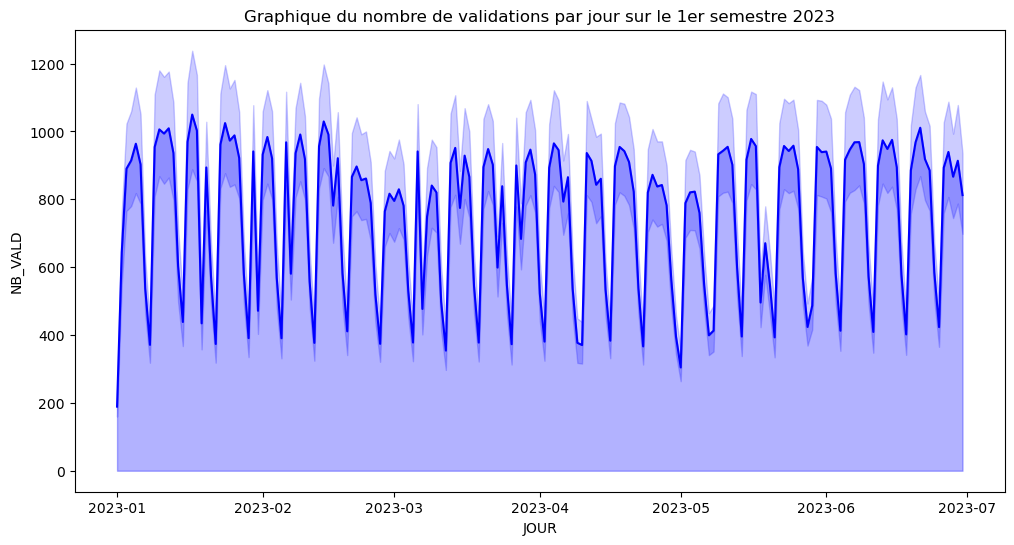

In [74]:
# évolution du nombre de validations par jours sur le premier semestre

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='JOUR', y='NB_VALD', data=validations_23_RER, color = "blue")
l1 = ax.lines[0]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
ax.fill_between(x1, y1, color="blue", alpha=0.3)

plt.title('Graphique du nombre de validations par jour sur le 1er semestre 2023')
plt.show()

In [68]:
# agrégation des données de validations par mois

vald_23_RER_mois = validations_23_RER.groupby(validations_23_RER['Mois']).agg({'NB_VALD': 'sum'}).reset_index()
vald_23_RER_mois

,Mois,NB_VALD
0,1,43260072
1,2,38798891
2,3,39804248
3,4,39112286
4,5,40903871
5,6,44336808


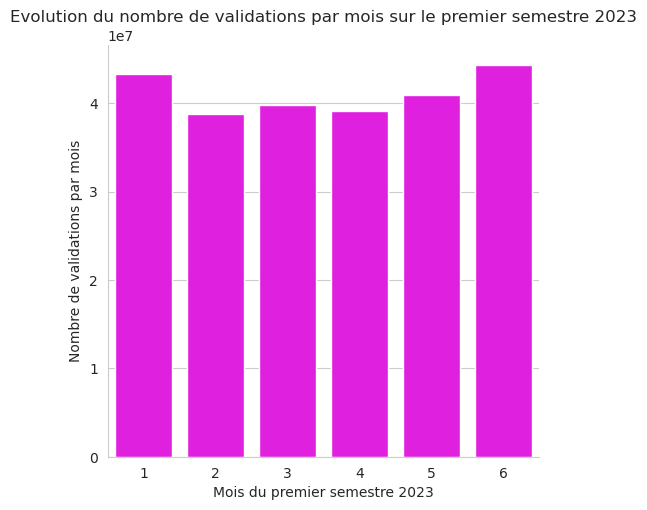

In [193]:
#évolution du nombre de validation par mois sur le premier semestre 2023

sns.set_style("whitegrid")
g = sns.catplot(x='Mois', y='NB_VALD', data=vald_23_RER_mois, kind = "bar", height = 5, aspect = 1, color = "magenta")
g.set_axis_labels('Mois du premier semestre 2023', 'Nombre de validations par mois')
plt.title('Evolution du nombre de validations par mois sur le premier semestre 2023')

plt.show()

In [73]:
# évolution de la moyenne du nombre de validations par mois 

vald_23_RER_moy_mois = validations_23_RER.groupby('Mois').agg({'NB_VALD': 'mean'}).reset_index()
vald_23_RER_moy_mois

,Mois,NB_VALD
0,1,780.304329
1,2,777.797867
2,3,744.004636
3,4,729.802138
4,5,735.310833
5,6,813.713510


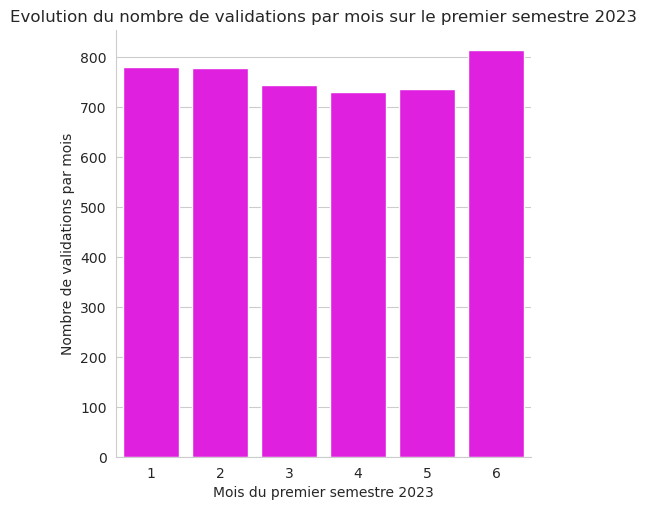

In [76]:
# graphe de la moyenne du nombre de validations par mois sur le premier semestre 2023

sns.set_style("whitegrid")
g = sns.catplot(x='Mois', y='NB_VALD', data=vald_23_RER_moy_mois, kind = "bar", height = 5, aspect = 1, color = "magenta")
g.set_axis_labels('Mois du premier semestre 2023', 'Nombre de validations par mois')
plt.title('Evolution du nombre de validations par mois sur le premier semestre 2023')

plt.show()

In [79]:
# évolution de la médiane du nombre de validations par mois 

vald_23_RER_med_mois = validations_23_RER.groupby('Mois').agg({'NB_VALD': 'median'}).reset_index()
vald_23_RER_med_mois

,Mois,NB_VALD
0,1,111.0
1,2,116.0
2,3,109.0
3,4,111.0
4,5,115.0
5,6,125.0


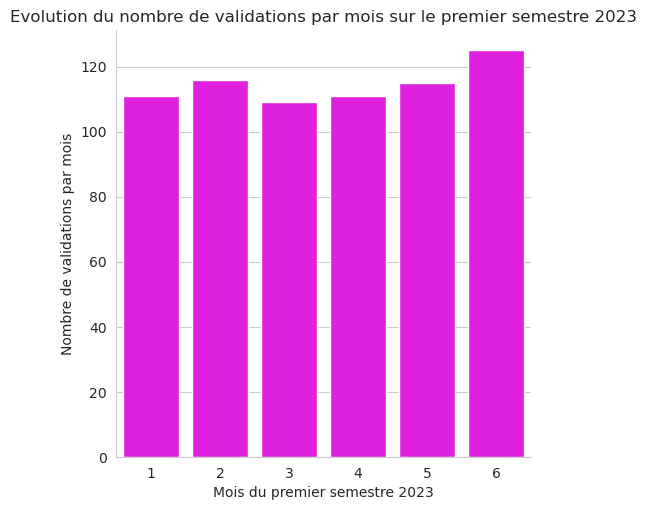

In [80]:
# graphe de la médiane du nombre de validations par mois sur le premier semestre 2023

sns.set_style("whitegrid")
g = sns.catplot(x='Mois', y='NB_VALD', data=vald_23_RER_med_mois, kind = "bar", height = 5, aspect = 1, color = "magenta")
g.set_axis_labels('Mois du premier semestre 2023', 'Nombre de validations par mois')
plt.title('Evolution du nombre de validations par mois sur le premier semestre 2023')

plt.show()

## 1.2 Etude de la variable *CATEGORIE_TITRE*

In [82]:
# grouper par mois et par catégorie de titre

vald_23_RER_mois_categorie = validations_23_RER.groupby(['Mois', 'CATEGORIE_TITRE']).agg({'NB_VALD': 'sum'}).reset_index()
vald_23_RER_mois_categorie

,Mois,CATEGORIE_TITRE,NB_VALD
0,1,AMETHYSTE,680002
1,1,AUTRE TITRE,486772
2,1,FGT,1520326
3,1,IMAGINE R,10129757
4,1,NAVIGO,24465964
5,1,NAVIGO JOUR,122157
6,1,NON DEFINI,1945718
7,1,TST,3909376
8,2,AMETHYSTE,650658
9,2,AUTRE TITRE,448818


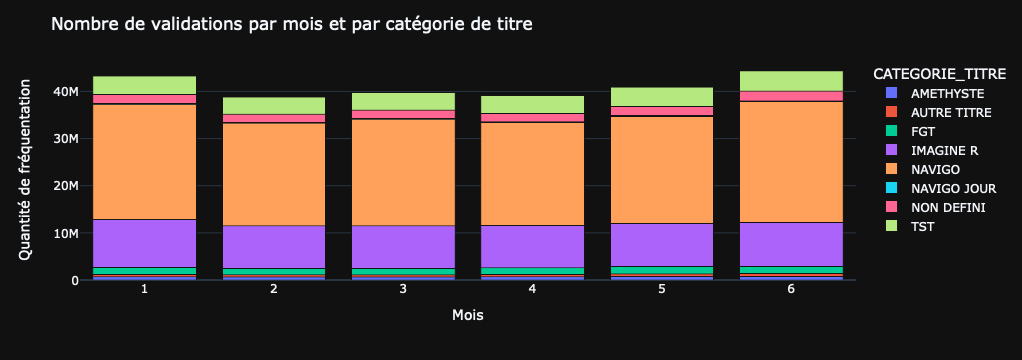

In [83]:
# graphe par mois de la fréquentation associée à chaque type de titre de transport

fig = px.bar(vald_23_RER_mois_categorie, x='Mois', y='NB_VALD', color='CATEGORIE_TITRE',
             labels={'NB_VALD': 'Nombre de validations', 'Mois': 'Mois'})

fig.update_layout(
    title='Nombre de validations par mois et par catégorie de titre',
    xaxis_title='Mois',
    yaxis_title='Quantité de fréquentation',
    template='plotly_dark',  
)

fig.show()

Sans grande surprise, la catégorie de titre de transport la plus utilisée est le Navigo, suivi de près par l'Imagine R (étudiant)

## 1.3 Etude géographique

In [88]:
# dataframe du nombre de validations par arrêt sur tout le premier semestre 

stations_freq = validations_23_RER.groupby('LIBELLE_ARRET')['NB_VALD'].sum().reset_index()
stations_freq.head(5)

,LIBELLE_ARRET,NB_VALD
0,ABLON,243447
1,ACHERES GRAND,9610
2,ACHERES VILLE,751813
3,AEROPORT CDG1,1070579
4,AEROPORT CDG2,826442


In [96]:
# dataframe des stations les plus fréquentées (en terme de nombre de validations)

stations_freq_sorted = stations_freq.sort_values(by='NB_VALD', ascending=False)
stations_freq_sorted_top = stations_freq_sorted.head(20)
stations_freq_sorted.head(10)

,LIBELLE_ARRET,NB_VALD
50,CHATELET,15587746
84,GARE DE LYON,14926390
107,LA DEFENSE,12590292
105,JUVISY,3828798
152,NOISY-LE-GRAND,3620278
213,VAL D.FONTENAY,3575498
227,VINCENNES,3430408
58,CITE UNIV.,3196778
85,GARGES SARCELLE,3133537
11,AULNAY SS BOIS,3033580


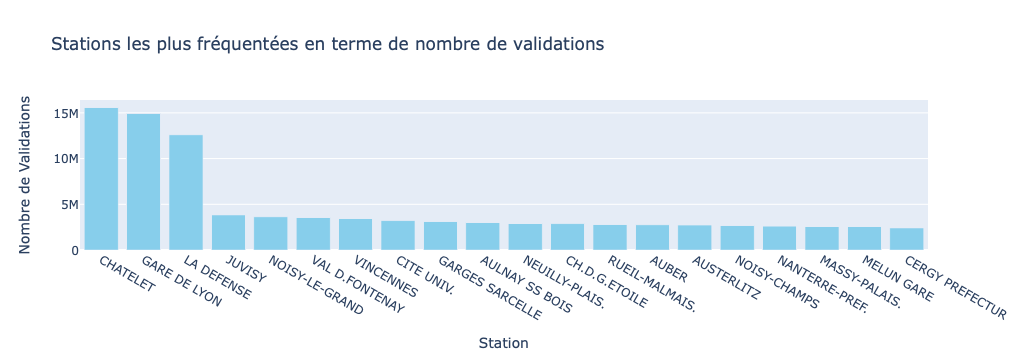

In [97]:
# graphe des stations les plus fréquentées et du nombre de validations associé

fig = px.bar(stations_freq_sorted_top, x='LIBELLE_ARRET', y='NB_VALD',
             title='Stations les plus fréquentées en terme de nombre de validations',
             labels={'LIBELLE_ARRET': 'Station', 'NB_VALD': 'Nombre de Validations'})

fig.update_traces(marker=dict(color='skyblue'), selector=dict(type='bar'))

fig.show()


# idées : 

- évolution de la fréquentation de manière différenciée : selon le titre de transport

- faire une carte de l'importance de la fréquentation sur tout le semestre en fonction de la localisation

*Note à moi-même : inutile ici, mais utile dans la présentation des données : à remettre ailleurs*

Quelques précisions sur les données de validations afin de bien comprendre la manière dont on pourrait utiliser cette base.

Les données de validations ne comptabilisent pas :
- les tickets magnétiques (par exemple, les ticket T+, Forfait Mobilis, Forfait Paris Visite, etc.)
- les usagers qui ne valident pas à la montée dans un bus ou tram, ou en entrant dans une gare (par exemple si le quai est
accessible sans passer par une barrière de contrôle, ou si les barrières de contrôle sont indisponibles en raison de travaux, etc. )
- les fraudeurs

… et donnent donc une vision incomplète du trafic sur le réseau de transport.
*(Note à nous-même : à rajouter dans la conclusion, dans les limites)*

La base de données ci-dessus est tirée d'une base de données elle-même composée :
- du **réseau ferré** (RER, métro, transilien), qui est caractérisé par des **arrêts** 
- du réseau dit de **"lignes administratives"** (bus, tram), aussi appelé **réseau de surface**, qui est caractérisé par des **lignes**

Cela génère une différence dans le type de validation :
- les validations du **réseau ferré** sont rattachées à une **station**
- les validations du **réseau de surface** sont rattachées à une **ligne** (car les valideurs sont embarqués dans les véhicules et donc mobiles).

**Qu'est-ce qu'une ligne ?**
Dans les données de validation, la notion de ligne regroupe un ensemble d’arrêts prédéfinis par l’offre de transport. Elle est identifiée par un nom de ligne et un identifiant de ligne.

**Qu'est-ce qu'un arrêt ?**
Dans les données de validation, un arrêt est le lieu où le voyageur valide son titre de transport sur le réseau ferré (i.e. dans une station de métro ou une gare). Il est identifié par un nom d’arrêt et un identifiant de l’arrêt.

**Conclusion** : dans notre base de donnée à nous, nous n'avons **que les validations du réseau ferré**, et donc **par arrêt**. 